# CARBON FOOTPRINTS PREDICTION

# Problem Statement

#### This project aims to develop an AI/ML-based predictive model that estimates the carbon footprint (kg CO₂) of an industry using operational features like energy consumption, fuel type, production capacity, and efficiency levels. Such a model will help organizations quantify, forecast, and minimize emissions, thereby supporting the goals of sustainable energy and efficiency.


# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Loading the dataset

In [4]:
df = pd.read_csv("dataset.csv")

In [5]:
df.head()

,Electricity_Usage_kWh,Fuel_Type,Production_Volume_Tons,Efficiency_Rating,Carbon_Footprint_kgCO2
0,16795,Natural Gas,1937,0.88,12004.1
1,1860,Natural Gas,3316,0.86,7038.8
2,39158,Natural Gas,716,0.82,21047.8
3,45732,Coal,4238,0.99,33471.0
4,12284,Renewables,721,0.95,6336.2


# Getting insights from the dataset

In [6]:
df.shape

(500, 5)

In [7]:
df.size

2500

In [8]:
df.dtypes

Electricity_Usage_kWh       int64
Fuel_Type                  object
Production_Volume_Tons      int64
Efficiency_Rating         float64
Carbon_Footprint_kgCO2    float64
dtype: object

In [9]:
df.info

<bound method DataFrame.info of      Electricity_Usage_kWh    Fuel_Type  Production_Volume_Tons  \
0                    16795  Natural Gas                    1937   
1                     1860  Natural Gas                    3316   
2                    39158  Natural Gas                     716   
3                    45732         Coal                    4238   
4                    12284   Renewables                     721   
..                     ...          ...                     ...   
495                  36247   Renewables                    1391   
496                  30222   Renewables                    8457   
497                  27211   Renewables                     388   
498                  38220         Coal                    5945   
499                  27646       Diesel                    2758   

     Efficiency_Rating  Carbon_Footprint_kgCO2  
0                 0.88                 12004.1  
1                 0.86                  7038.8  
2               

In [10]:
df.describe

<bound method NDFrame.describe of      Electricity_Usage_kWh    Fuel_Type  Production_Volume_Tons  \
0                    16795  Natural Gas                    1937   
1                     1860  Natural Gas                    3316   
2                    39158  Natural Gas                     716   
3                    45732         Coal                    4238   
4                    12284   Renewables                     721   
..                     ...          ...                     ...   
495                  36247   Renewables                    1391   
496                  30222   Renewables                    8457   
497                  27211   Renewables                     388   
498                  38220         Coal                    5945   
499                  27646       Diesel                    2758   

     Efficiency_Rating  Carbon_Footprint_kgCO2  
0                 0.88                 12004.1  
1                 0.86                  7038.8  
2             

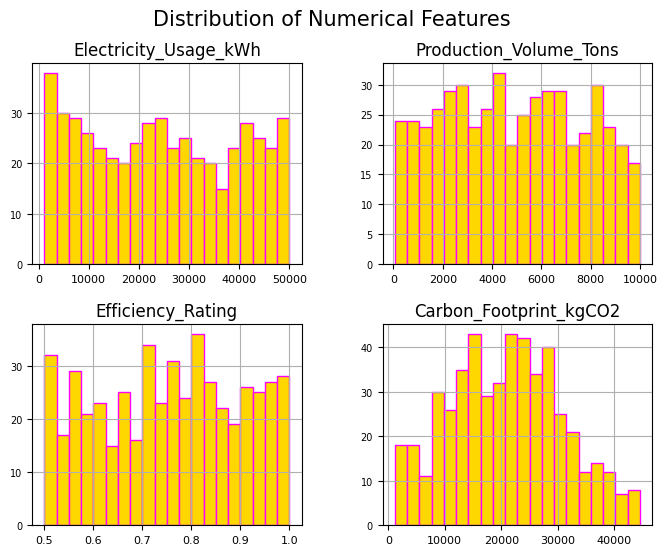

In [11]:
df.hist(figsize = (8, 6), bins = 20, xlabelsize = 8, ylabelsize = 7, color = 'gold', edgecolor = 'magenta')
plt.suptitle("Distribution of Numerical Features",fontsize = 15, y = 0.97)
plt.show()

# PREPROCESSING

# checking for null values

In [12]:
df.isnull()

,Electricity_Usage_kWh,Fuel_Type,Production_Volume_Tons,Efficiency_Rating,Carbon_Footprint_kgCO2
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
495,False,False,False,False,False
496,False,False,False,False,False
497,False,False,False,False,False
498,False,False,False,False,False


In [13]:
df.isnull().sum()

Electricity_Usage_kWh     0
Fuel_Type                 0
Production_Volume_Tons    0
Efficiency_Rating         0
Carbon_Footprint_kgCO2    0
dtype: int64

# Conversion of string values to categorical values

In [14]:
print(df["Fuel_Type"].dtype)

object


In [15]:
print(df['Fuel_Type'].unique())

['Natural Gas' 'Coal' 'Renewables' 'Diesel']


In [16]:
fuel_mapping = {"Natural Gas": 1, "Coal": 3, "Renewables": 0, "Diesel": 2}
df["Fuel_Type"] = df["Fuel_Type"].map(fuel_mapping)

In [17]:
df.head()

,Electricity_Usage_kWh,Fuel_Type,Production_Volume_Tons,Efficiency_Rating,Carbon_Footprint_kgCO2
0,16795,1,1937,0.88,12004.1
1,1860,1,3316,0.86,7038.8
2,39158,1,716,0.82,21047.8
3,45732,3,4238,0.99,33471.0
4,12284,0,721,0.95,6336.2


# Defining the arrays

In [18]:
x = df.drop(['Carbon_Footprint_kgCO2'], axis = 1)
y = df['Carbon_Footprint_kgCO2']

In [19]:
x.head()

,Electricity_Usage_kWh,Fuel_Type,Production_Volume_Tons,Efficiency_Rating
0,16795,1,1937,0.88
1,1860,1,3316,0.86
2,39158,1,716,0.82
3,45732,3,4238,0.99
4,12284,0,721,0.95


In [20]:
y.head()

0    12004.1
1     7038.8
2    21047.8
3    33471.0
4     6336.2
Name: Carbon_Footprint_kgCO2, dtype: float64

# Splitting the dataset

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [22]:
x_train

,Electricity_Usage_kWh,Fuel_Type,Production_Volume_Tons,Efficiency_Rating
249,9680,1,5159,0.80
433,1876,2,4275,0.97
19,18568,0,7290,0.71
322,46525,3,7236,0.94
332,20738,3,6066,0.70
...,...,...,...,...
106,14986,2,167,0.73
270,42976,2,9574,0.87
348,19589,2,6772,0.51
435,5142,1,5991,0.58


In [23]:
y_train

249    14326.2
433    10373.0
19     11032.0
322    41412.5
332    25834.0
        ...   
106     8130.4
270    42680.8
348    25182.9
435    13774.8
102     5110.8
Name: Carbon_Footprint_kgCO2, Length: 400, dtype: float64

In [24]:
x_test

,Electricity_Usage_kWh,Fuel_Type,Production_Volume_Tons,Efficiency_Rating
361,1699,1,6662,0.89
73,38065,3,4256,0.56
374,37631,3,4227,0.83
155,44585,3,5465,0.94
104,40504,0,6016,1.00
...,...,...,...,...
347,9208,0,3350,0.79
86,9529,3,1783,0.92
75,34763,3,7993,0.90
438,8079,1,4838,0.58


In [25]:
y_test

361    12951.1
73     30112.5
374    29553.0
155    36015.0
104    21455.2
        ...   
347     5484.0
86      9302.0
75     37464.0
438    13167.9
15      3589.0
Name: Carbon_Footprint_kgCO2, Length: 100, dtype: float64

# Training the model

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred = model.predict(x_test)
print(y_pred)

[10409.99012113 31719.35572201 31244.70855985 36886.21420515
 25252.69859543 22866.42497095 18233.93598453 19904.39718793
 20339.98331272 20027.06477037 32317.86196887 32838.00363171
 22652.82756464 23730.94150607 11844.32473964 35810.95747424
 14845.65503514  4876.42789922 19541.68036594 19095.04480901
 17840.55837048 13570.29171188 20953.93768915 28335.93147119
 30714.35255071 36653.50023024  8505.78074901 17197.18331064
 36145.08974826 37174.8280296  21149.25842006 20939.05466591
 25509.20031628 24579.17289326 18732.86248268 19924.73835249
 27465.1430938   5897.0996331  18121.33666475  7151.28128149
 26097.26846241 15712.099552   23558.35991001 16596.89290662
 11100.89109091 23188.98523336  9584.53827245 13210.06108789
 25831.04771046 11102.73249386  9850.68615421 13944.59470402
 33060.01550628 13368.87133398  5680.01862546 32786.20390969
 23720.60557679 32543.08324337 23774.09379368 13772.37409909
 23978.83252564 24213.72644376 12060.25997583 18083.76980622
 19976.02417771 30021.79

# Evaluations

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error =", mse)
print("R2 score =", r2)

Mean Squared Error = 11314650.90429528
R2 score = 0.8751509004812259


# Visualisations

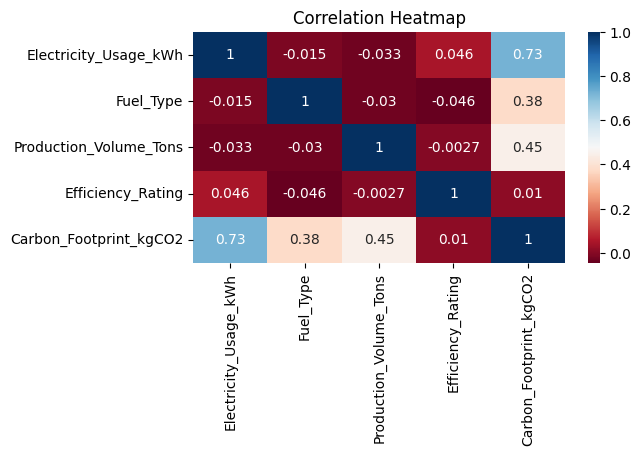

In [29]:
corr = df.corr()
plt.figure(figsize=(6,3))
sns.heatmap(corr, annot = True, cmap = "RdBu")
plt.title("Correlation Heatmap")
plt.show()

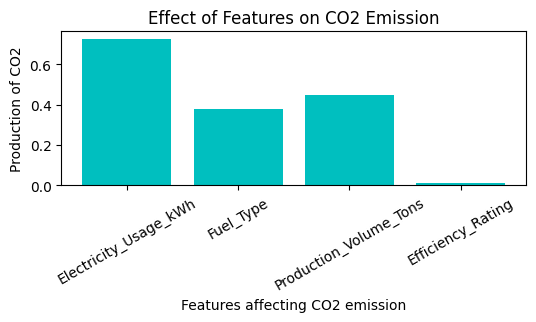

In [30]:
features = ["Electricity_Usage_kWh", "Fuel_Type", "Production_Volume_Tons",	"Efficiency_Rating"]
feature_impact = corr["Carbon_Footprint_kgCO2"].drop("Carbon_Footprint_kgCO2")
plt.figure(figsize=(6,2))
plt.bar(features, feature_impact.values, color = 'c')
plt.xlabel("Features affecting CO2 emission")
plt.ylabel("Production of CO2")
plt.title("Effect of Features on CO2 Emission")
plt.xticks(rotation=30)
plt.show()

# Predictions using user input

In [31]:
def predict():
    print("Hello User !! \nGive all the features details.")

    Electricity_Usage_kWh = int(input("Enter Electricity usage in KWh : "))
    Fuel_Type = int(input("Enter fuel type (Natural Gas : 0, Diesel : 2, Coal : 3, Renewables: 1) : "))
    Production_Vol_tons  = int(input("Enter Production value : "))
    Efficiency_rating = float(input("Enter Efficiency rating : "))

    input_data = pd.DataFrame([{
        'Electricity_Usage_kWh': Electricity_Usage_kWh,
        'Fuel_Type': Fuel_Type,
        'Production_Volume_Tons': Production_Vol_tons,
        'Efficiency_Rating': Efficiency_rating
    }])

    prediction = model.predict(input_data)

    print("Predicted Carbon Emission : ",prediction, "Kg CO2")

predict()

Hello User !! 
Give all the features details.


Enter Electricity usage in KWh :  3200
Enter fuel type (Natural Gas : 0, Diesel : 2, Coal : 3, Renewables: 1) :  1
Enter Production value :  7869
Enter Efficiency rating :  0.45


Predicted Carbon Emission :  [13658.73319373] Kg CO2


# Saving the model with Joblib

In [32]:
joblib.dump(model, "Carbon Footprints Prediction.pkl")

['Carbon Footprints Prediction.pkl']